This notebook is about The study area which includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. We have to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. We must predict the Cover_Type for every row in the test set (565892 observations).


Data Fields
Elevation - Elevation in meters
Aspect - Aspect in degrees azimuth
Slope - Slope in degrees
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation


The wilderness areas are:

1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area

And there are 40 soil Types

# Basic EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('G:/forest_train.csv')
test_df = pd.read_csv('G:/forest_test.csv')

In [4]:
train_df.shape , test_df.shape

((15120, 56), (565892, 55))

In [5]:
train_df.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [6]:
numeric_features = train_df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
categorical_features = train_df.select_dtypes(include=[np.object])
categorical_features.columns

Index([], dtype='object')

'Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points' are the numerical variables.

The categorical variables are: Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

In [8]:
num_val = train_df.nunique()
print(num_val)

Id                                    15120
Elevation                              1665
Aspect                                  361
Slope                                    52
Horizontal_Distance_To_Hydrology        400
Vertical_Distance_To_Hydrology          423
Horizontal_Distance_To_Roadways        3250
Hillshade_9am                           176
Hillshade_Noon                          141
Hillshade_3pm                           247
Horizontal_Distance_To_Fire_Points     2710
Wilderness_Area1                          2
Wilderness_Area2                          2
Wilderness_Area3                          2
Wilderness_Area4                          2
Soil_Type1                                2
Soil_Type2                                2
Soil_Type3                                2
Soil_Type4                                2
Soil_Type5                                2
Soil_Type6                                2
Soil_Type7                                1
Soil_Type8                      

In [9]:
train_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [10]:
train_df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
train_df.corr()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,...,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,...,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,...,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,...,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,...,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,...,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,-0.033028,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,...,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.000786,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,...,0.018760,-0.050739,0.004457,0.031228,0.013886,0.013207,0.012326,0.024492,-0.017234,-0.010286
Hillshade_Noon,0.073123,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,...,0.096261,-0.013129,0.034149,0.034638,0.029261,-0.035385,0.104682,-0.058979,-0.008203,-0.098905
Hillshade_3pm,0.042524,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,...,0.058244,0.024496,0.018298,0.000662,0.004545,-0.028055,0.069262,-0.056383,0.019158,-0.053399


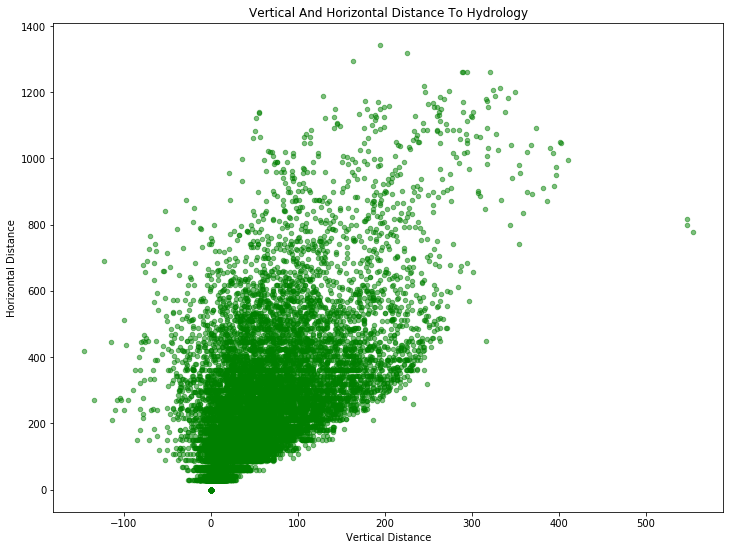

In [15]:
train_df.plot(kind='scatter', x='Vertical_Distance_To_Hydrology', y='Horizontal_Distance_To_Hydrology', alpha=0.5, color='green', figsize = (12,9))
plt.title('Vertical And Horizontal Distance To Hydrology')
plt.xlabel("Vertical Distance")
plt.ylabel("Horizontal Distance")
plt.show()

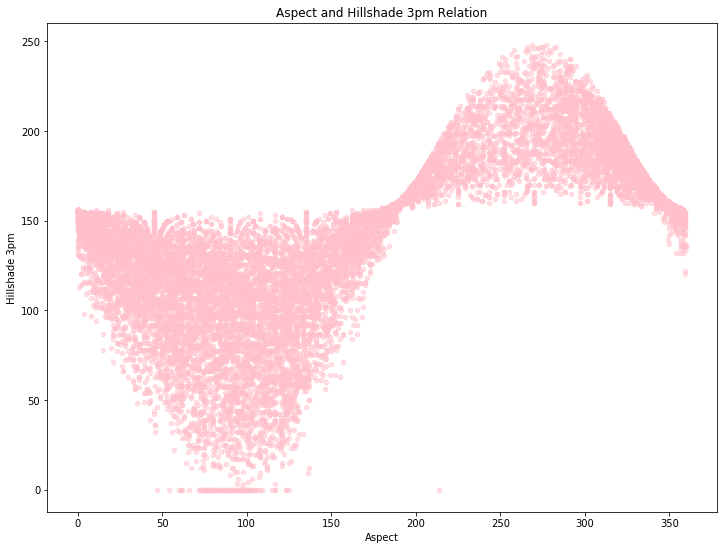

In [16]:
train_df.plot(kind='scatter', x='Aspect', y='Hillshade_3pm', alpha=0.5, color='pink', figsize = (12,9))
plt.title('Aspect and Hillshade 3pm Relation')
plt.xlabel("Aspect")
plt.ylabel("Hillshade 3pm")
plt.show()

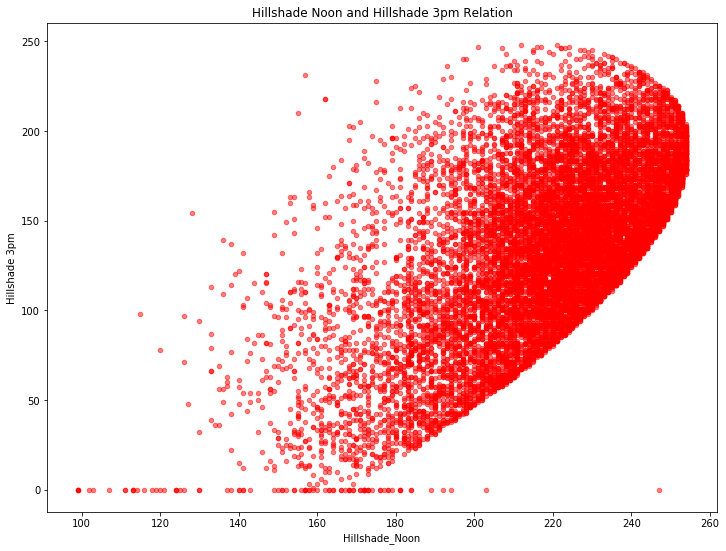

In [17]:
train_df.plot(kind='scatter', x='Hillshade_Noon', y='Hillshade_3pm', alpha=0.5, color='red', figsize = (12,9))
plt.title('Hillshade Noon and Hillshade 3pm Relation')
plt.xlabel("Hillshade_Noon")
plt.ylabel("Hillshade 3pm")
plt.show()

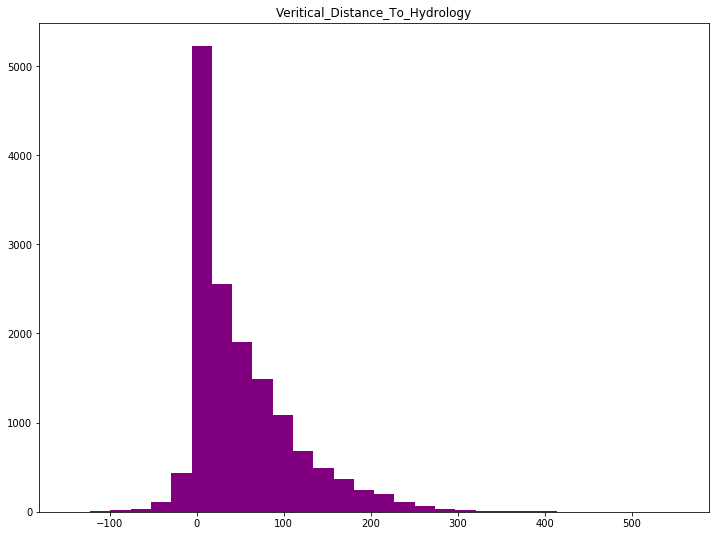

In [18]:
plt.figure(figsize=(12,9))
plt.hist(train_df['Vertical_Distance_To_Hydrology'],bins=30,color='purple')
plt.title('Veritical_Distance_To_Hydrology')
plt.show()

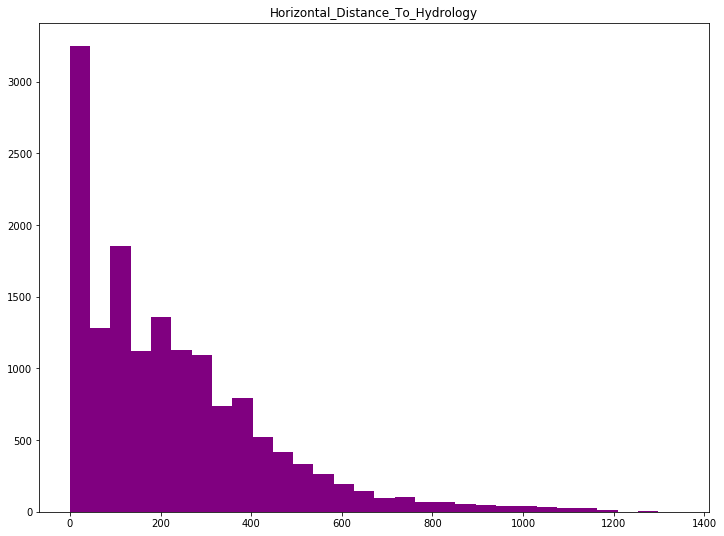

In [32]:
plt.figure(figsize=(12,9))
plt.hist(train_df['Horizontal_Distance_To_Hydrology'],bins=30,color='purple')
plt.title('Horizontal_Distance_To_Hydrology')
plt.show()

Text(0.5, 1.0, 'Count of Soil Types With Value 1')

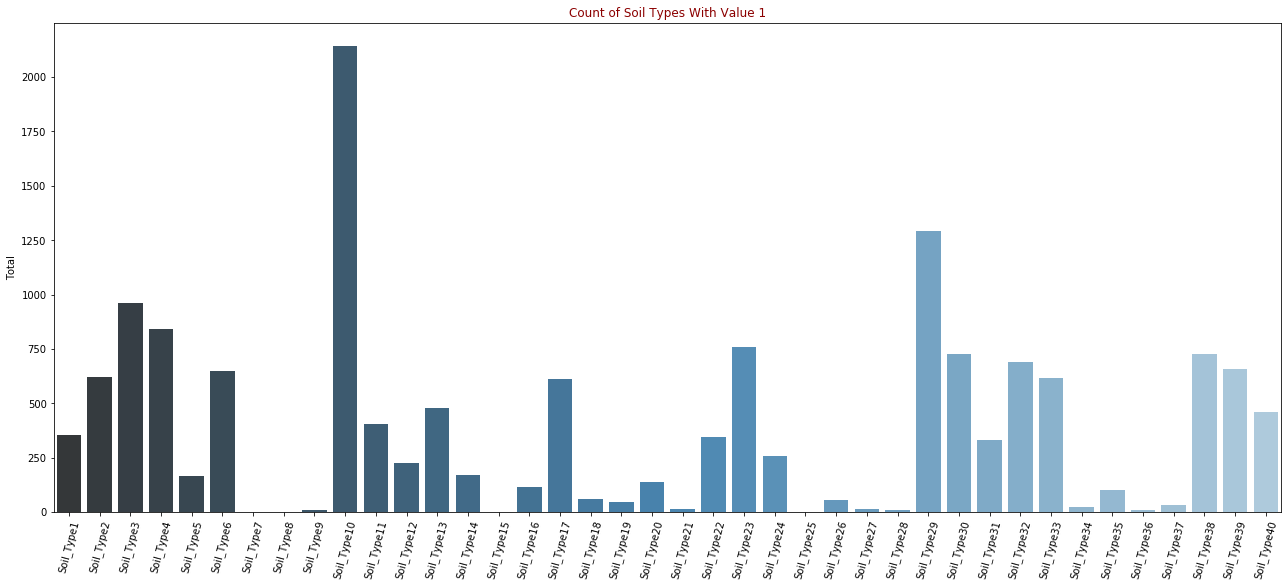

In [19]:
soil_types = train_df.iloc[:,15:-1].sum(axis=0)
plt.figure(figsize=(22,9))
sns.barplot(x=soil_types.index, y=soil_types.values, palette="Blues_d")
plt.xticks(rotation= 75)
plt.ylabel('Total')
plt.title('Count of Soil Types With Value 1',color = 'darkred',fontsize=12)

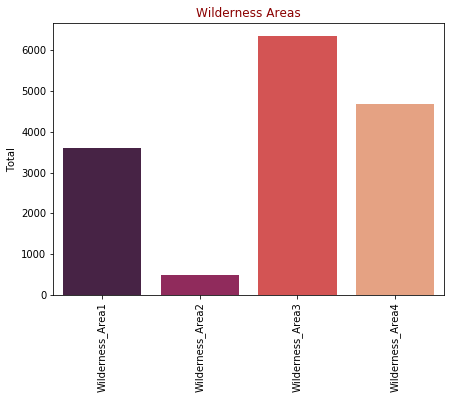

In [20]:
wilderness_areas = train_df.iloc[:,11:15].sum(axis=0)

plt.figure(figsize=(7,5))
sns.barplot(x=wilderness_areas.index,y=wilderness_areas.values, palette="rocket")
plt.xticks(rotation=90)
plt.title('Wilderness Areas',color = 'darkred',fontsize=12)
plt.ylabel('Total')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [31]:
ID = test_df['Id'] # save this for later 

In [32]:
train_df['EV_DTH'] = (train_df.Elevation - train_df.Vertical_Distance_To_Hydrology)
test_df['EV_DTH'] = (test_df.Elevation - test_df.Vertical_Distance_To_Hydrology)


train_df['EH_DTH'] = (train_df.Elevation -  (train_df.Horizontal_Distance_To_Hydrology *0.2))
test_df['EH_DTH'] = (test_df.Elevation -  (test_df.Horizontal_Distance_To_Hydrology *0.2))

train_df['Dis_To_Hy'] = (((train_df.Horizontal_Distance_To_Hydrology **2) + (train_df.Vertical_Distance_To_Hydrology **2))**0.5)
test_df['Dis_To_Hy'] = (((test_df.Horizontal_Distance_To_Hydrology **2) + (test_df.Vertical_Distance_To_Hydrology **2))**0.5)

train_df['HyF_1'] = (train_df.Horizontal_Distance_To_Hydrology + train_df.Horizontal_Distance_To_Fire_Points)
test_df['HyF_1'] = (test_df.Horizontal_Distance_To_Hydrology + test_df.Horizontal_Distance_To_Fire_Points)

train_df['HyF_2'] = (train_df.Horizontal_Distance_To_Hydrology - train_df.Horizontal_Distance_To_Fire_Points)
test_df['HyF_2'] = (test_df.Horizontal_Distance_To_Hydrology - test_df.Horizontal_Distance_To_Fire_Points)

train_df['HyR_1'] = (train_df.Horizontal_Distance_To_Hydrology + train_df.Horizontal_Distance_To_Roadways)
test_df['HyR_1'] = (test_df.Horizontal_Distance_To_Hydrology + test_df.Horizontal_Distance_To_Roadways)

train_df['HyR_2'] = (train_df.Horizontal_Distance_To_Hydrology - train_df.Horizontal_Distance_To_Roadways)
test_df['HyR_2'] = (test_df.Horizontal_Distance_To_Hydrology - test_df.Horizontal_Distance_To_Roadways)


train_df['FiR_1'] = (train_df.Horizontal_Distance_To_Fire_Points + train_df.Horizontal_Distance_To_Roadways)
test_df['FiR_1'] = (test_df.Horizontal_Distance_To_Fire_Points + test_df.Horizontal_Distance_To_Roadways)

train_df['FiR_1'] = (train_df.Horizontal_Distance_To_Fire_Points - train_df.Horizontal_Distance_To_Roadways)
test_df['FiR_1'] = (test_df.Horizontal_Distance_To_Fire_Points - test_df.Horizontal_Distance_To_Roadways)

train_df['Avg_shade'] = ((train_df.Hillshade_9am + train_df.Hillshade_Noon + train_df.Hillshade_3pm) /3)
test_df['Avg_shade'] = ((test_df.Hillshade_9am + test_df.Hillshade_Noon + test_df.Hillshade_3pm) /3)

train_df['Morn_noon_int'] = ((train_df.Hillshade_9am + train_df.Hillshade_Noon) / 2)
test_df['Morn_noon_int'] = ((test_df.Hillshade_9am + test_df.Hillshade_Noon) / 2)

train_df['noon_eve_int'] = ((train_df.Hillshade_3pm + train_df.Hillshade_Noon) / 2)
test_df['noon_eve_int'] = ((test_df.Hillshade_3pm + test_df.Hillshade_Noon) / 2)

train_df['Slope2'] = np.sqrt(train_df.Horizontal_Distance_To_Hydrology**2 + train_df.Vertical_Distance_To_Hydrology**2)
test_df['Slope2'] = np.sqrt(test_df.Horizontal_Distance_To_Hydrology**2 + test_df.Vertical_Distance_To_Hydrology**2)

In [36]:
train_df = train_df.drop(['Soil_Type7','Soil_Type15','Id'], axis =1)
test_df = test_df.drop(['Soil_Type7','Soil_Type15','Id'], axis =1)

In [37]:
y = train_df.Cover_Type
X = train_df.drop(['Cover_Type'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1)

In [38]:
clf_rf = RandomForestClassifier(n_jobs =  -1, n_estimators = 500, max_features = 12, max_depth = 35, random_state = 1)
clf_rf.fit(x_train,y_train)
rf_predictions = clf_rf.predict(x_test)
rf_predict_test = clf_rf.predict(test)
print(round(accuracy_score(y_test, rf_predictions),4))

0.8666


In [39]:
clf_dtc = DecisionTreeClassifier(random_state = 1, max_depth = 20, max_features = 35)
clf_dtc.fit(x_train,y_train)
dtc_predictions = clf_dtc.predict(x_test)
dtc_predict_test = clf_dtc.predict(test)
print(round(accuracy_score(y_test, dtc_predictions),4))

0.7885
